In [1]:
%load_ext autoreload
%autoreload 2

# Analysis of intermediate outputs

In [3]:
import pickle
import pandas as pd
import numpy as np
import note_seq as ns

import seaborn as sns
import matplotlib.pyplot as plt

from analysis import compute_structure_statistics
from create import load_structures
from search import HarmonicPatternFinder
from sonification import get_harmonic_notesequence

In [4]:
# Dictionary Segment ID (ChoCo-like) to TpsTimeSeries
hstructures = load_structures("../data/structures/v1/")
# Dictionary from Pattern ID to Segment ID
with open("../data/similarities/v1/pattern2id.pkl", "rb") as handle:
    pattern2id = pickle.load(handle)

# Harmonic pattern finder for search similar patterns given a query (as index or time series)
hfinder_model = HarmonicPatternFinder(model_ckpt="../data/similarities/v1/hfinder.pkl")
# Dataset of patterns, trivially works as map PatternID -> Pattern (time series)
patterns = hfinder_model.get_pattern_dataset()
# Similarity relationships (sim and same) for patterns
simi_relations = pd.read_csv("../data/similarities/v1/similarities.csv")

100%|██████████| 1792/1792 [00:01<00:00, 918.11it/s] 


## Harmonic structures

In [5]:
segment_statistics = compute_structure_statistics(hstructures)
# print(", ".join(list(segment_statistics.keys())))

print(f"Tot. structures detected: {segment_statistics['glob_num_structures']}")

100%|██████████| 25848/25848 [00:00<00:00, 651685.32it/s]

Tot. structures detected: 25848


Avg. duration of structures: 14.34 ± 9.01 seconds


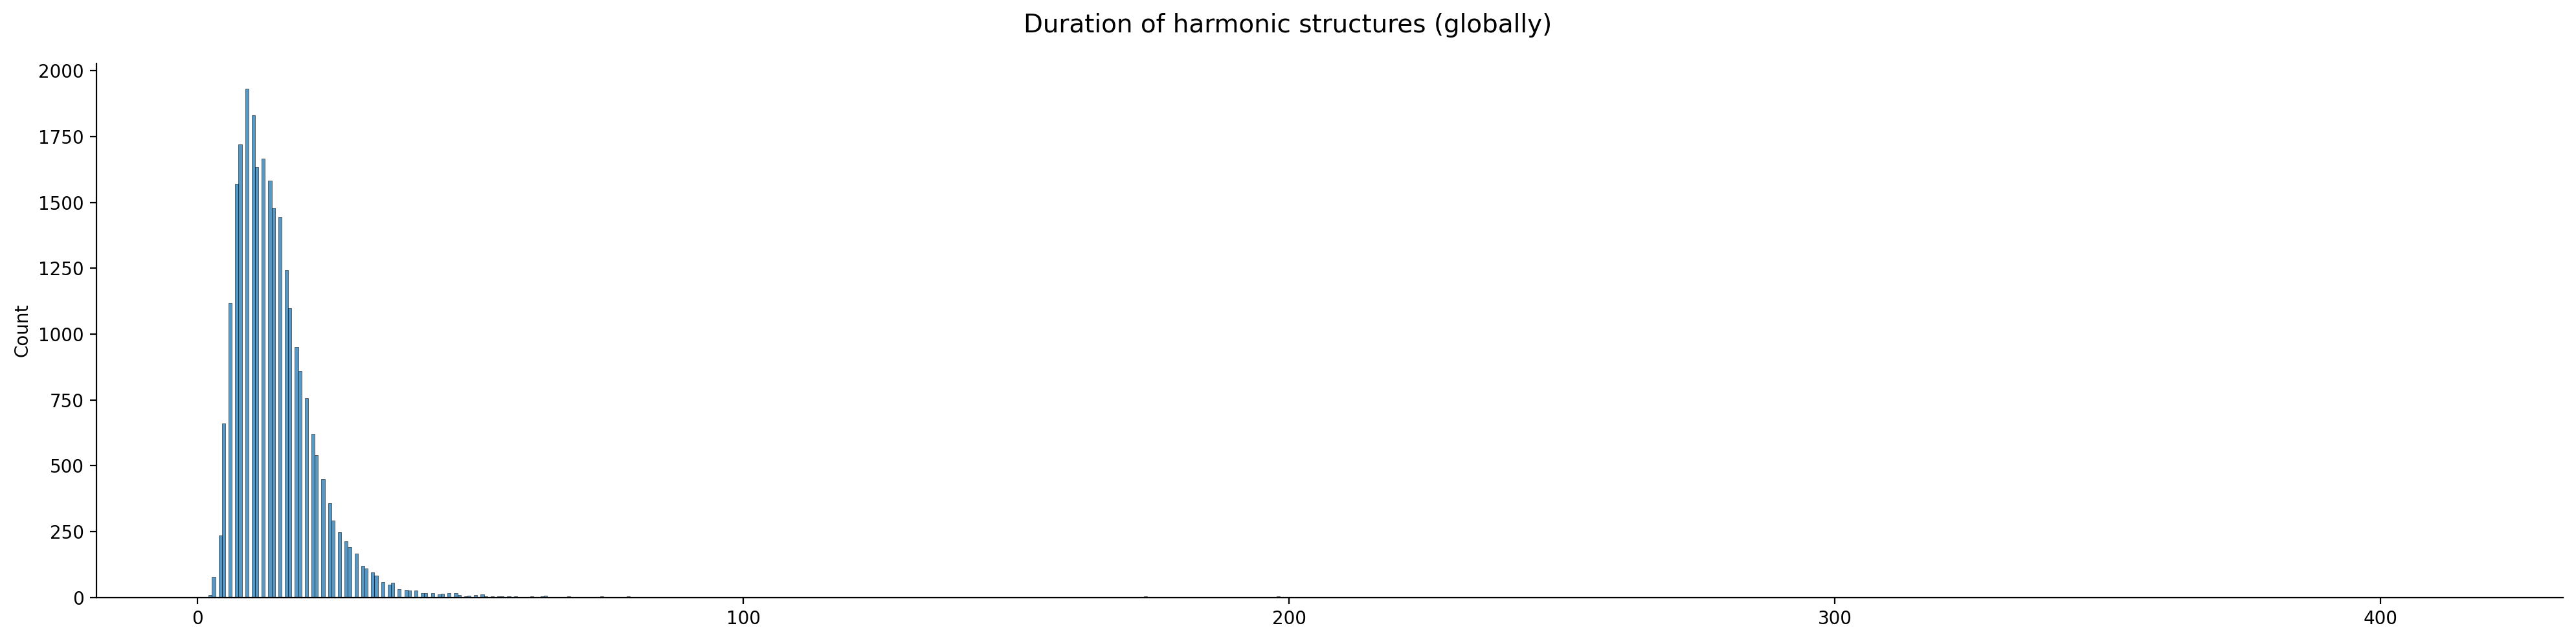

In [6]:
print(f"Avg. duration of structures: "
      f"{segment_statistics['glob_dur_mu']:.2f} "
      f"± {segment_statistics['glob_dur_std']:.2f} seconds")

# fig, ax = plt.subplots(figsize=(10, 5))
sax = sns.displot(segment_statistics["glob_durations"], aspect=4)
sax.fig.suptitle("Duration of harmonic structures (globally)", size=14)
plt.tight_layout()

Avg. number of structures per progression: 14.42 ± 5.06


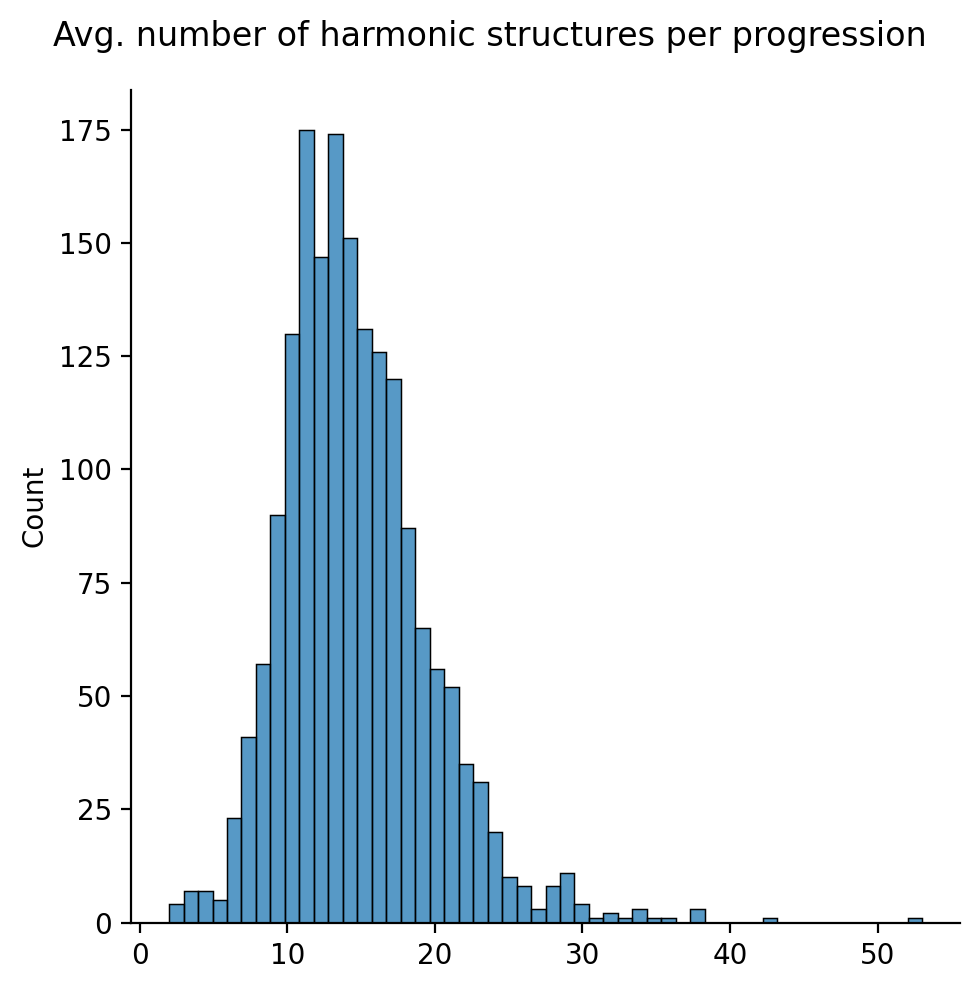

In [8]:
print(f"Avg. number of structures per progression: "
      f"{np.mean(segment_statistics['num_structures_php']):.2f} "
      f"± {np.std(segment_statistics['num_structures_php']):.2f}")

sax = sns.displot(segment_statistics['num_structures_php'])
sax.fig.suptitle("Avg. number of harmonic structures per progression", size=12)
plt.tight_layout()

Avg. duration of structures per progression: 14.97 ± 6.89 seconds


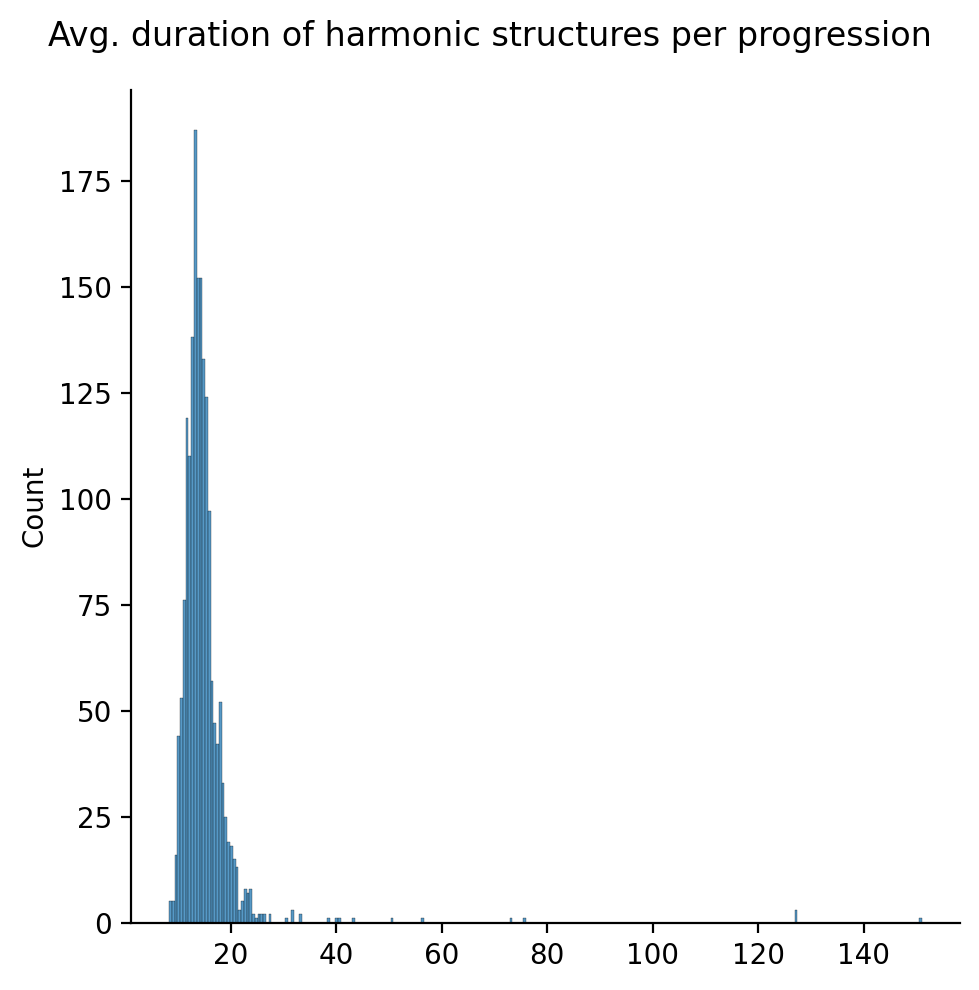

In [9]:
print(f"Avg. duration of structures per progression: "
      f"{np.mean(segment_statistics['dur_structures_php']):.2f} "
      f"± {np.std(segment_statistics['dur_structures_php']):.2f} seconds")

sax = sns.displot(segment_statistics['dur_structures_php'])
sax.fig.suptitle("Avg. duration of harmonic structures per progression", size=12)
plt.tight_layout()

## Similarities

In [10]:
from analysis import compute_similarity_statistics

In [ ]:
all_pattern_ids = list(pattern2id.keys())
simi_statistics = compute_similarity_statistics(simi_relations, all_pattern_ids)

In [12]:
no_simi_rels, no_same_rels = simi_statistics["no_simi_rels"], simi_statistics["no_same_rels"], 

print(f"SAME relations: {no_same_rels} ({no_same_rels / (len(simi_relations)):.2f})\n"
      f"SIMI relations: {no_simi_rels} ({no_simi_rels / (len(simi_relations)):.2f})")
print(f"Avg. SIMI distance: {simi_statistics['simi_rel_avg']:.2f}"
      f" ± {simi_statistics['simi_rel_std']:.2f}")

SAME relations: 13667 (0.17)
SIMI relations: 66175 (0.83)
Avg. SIMI distance: 1.10 ± 0.56


In [13]:
no_pattern_families, no_pattern_friendly, no_pattern_unique = \
    simi_statistics["no_pattern_families"], \
        simi_statistics["no_pattern_friendly"], \
            simi_statistics["no_pattern_unique"]

total_patterns = no_pattern_families + no_pattern_friendly + no_pattern_unique

print(f"Pattern families: {no_pattern_families} ({no_pattern_families / total_patterns:.2f})\n"
      f"Pattern friendly: {no_pattern_friendly} ({no_pattern_friendly / total_patterns:.2f})\n"
      f"Pattern unique: {no_pattern_unique} ({no_pattern_unique / total_patterns:.2f})")

Pattern families: 4089 (0.16)
Pattern friendly: 13583 (0.53)
Pattern unique: 8176 (0.32)


Text(0.5, 1.0, 'No. of proper similarity relationships per pattern')

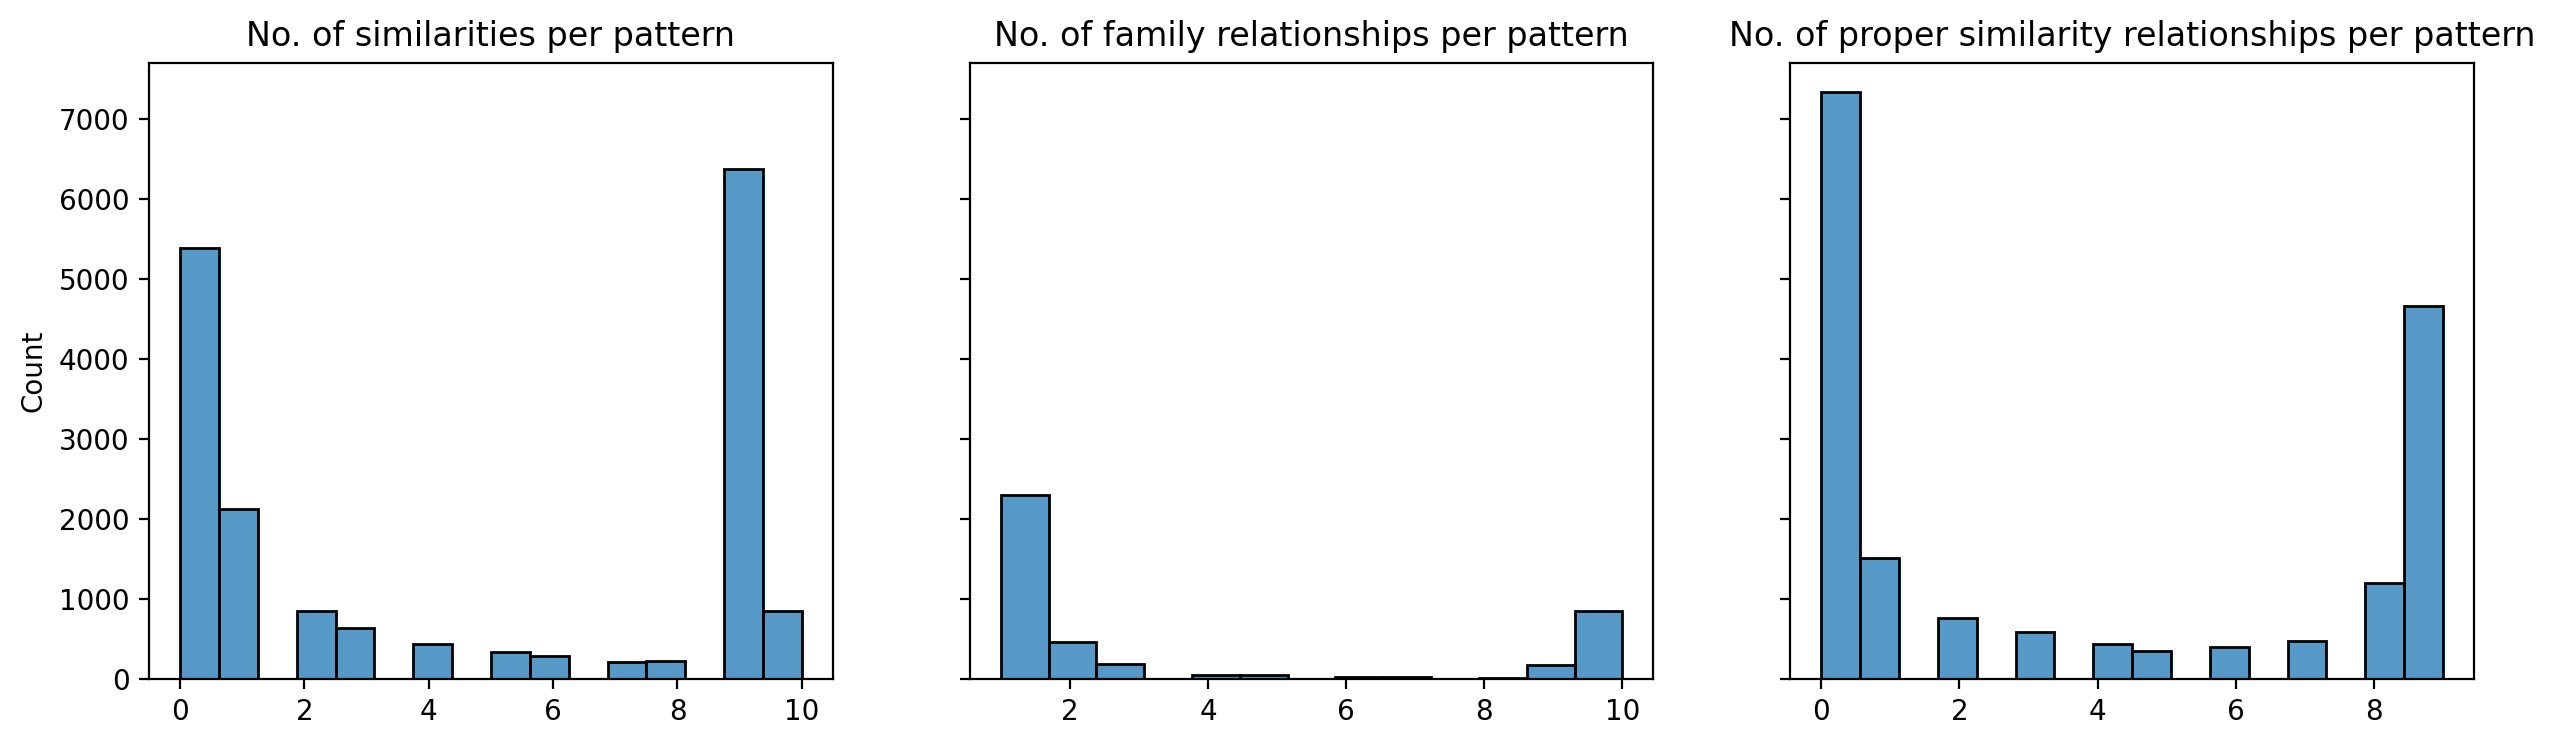

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(15,4), sharey=True)
sns.histplot(simi_statistics["pattern_neigh_sizes"],
             label="neighbourhood", ax=ax[0])
ax[0].set_title("No. of similarities per pattern")
sns.histplot(simi_statistics["pattern_family_sizes"],
             label="family", ax=ax[1])
ax[1].set_title("No. of family relationships per pattern")
sns.histplot(simi_statistics["pattern_simila_sizes"],
             label="neighbourhood", ax=ax[2])
ax[2].set_title("No. of proper similarity relationships per pattern")

Text(0.5, 1.0, 'Average distance for each pattern (no same)')

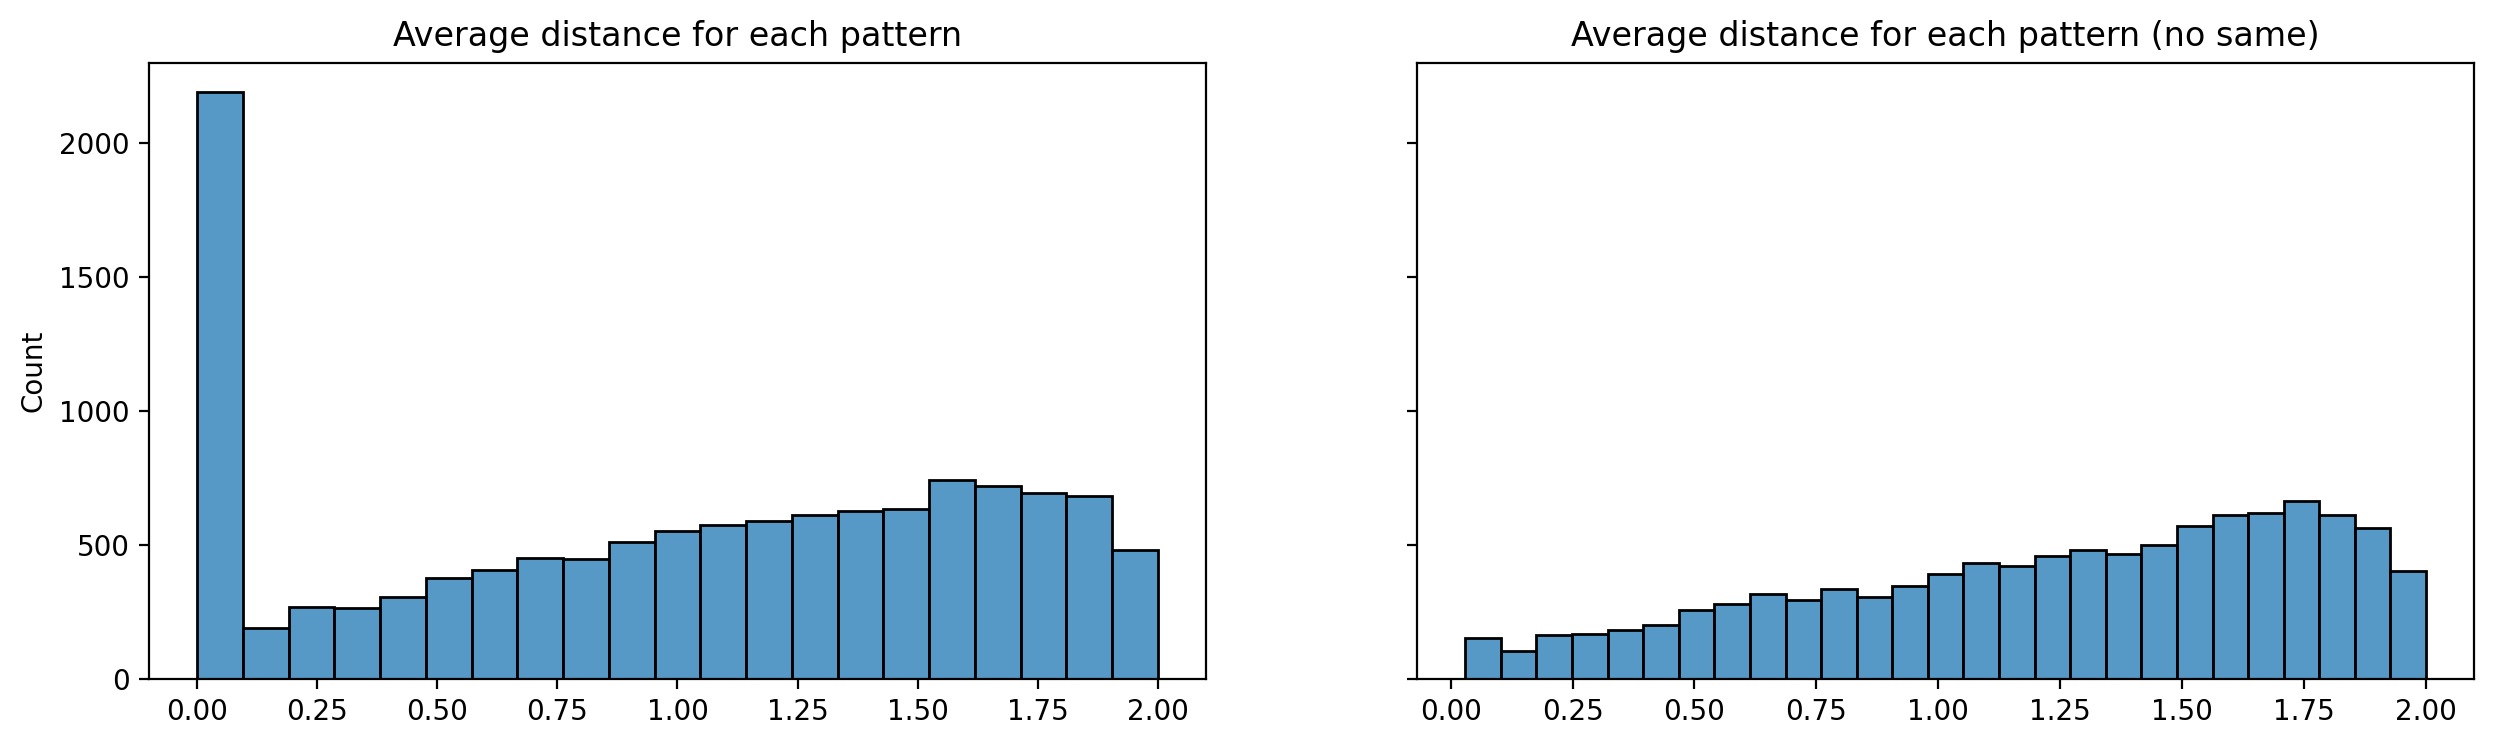

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4), sharey=True)

sns.histplot(simi_statistics["pattern_avg_distance_all"], ax=ax[0])
ax[0].set_title("Average distance for each pattern")

sns.histplot(simi_statistics["pattern_avg_distance_nosame"], ax=ax[1])
ax[1].set_title("Average distance for each pattern (no same)")